In [1]:
%config Completer.use_jedi = False
import pandas as pd
from Bio import SeqIO
import re

df_func = pd.read_csv("amp_function/function_metadata.csv")

sequences = []
for idx, record in enumerate(SeqIO.parse("amp_100_pep_toolbox_raw.fasta", "fasta")):
    sequences.append(str(record.seq))
df_seq = pd.DataFrame(sequences, columns=["sequences"])

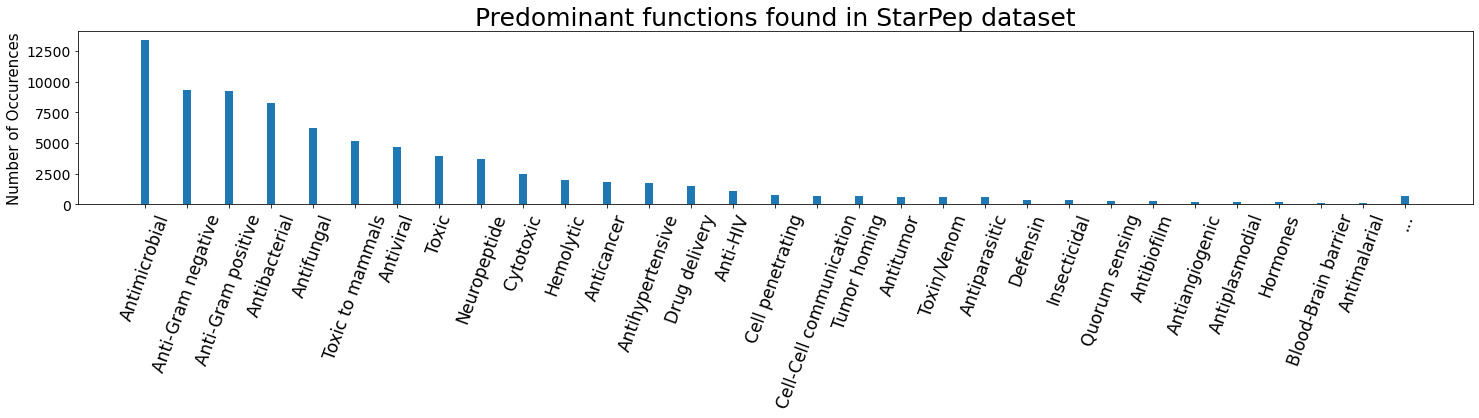

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,6))
ax.tick_params(axis='x', which='major', labelsize=17)
ax.tick_params(axis='y', which='major', labelsize=14)
count = list(df_func['Metadata'].value_counts().to_dict().values())[0:30]
count.append(sum(list(df_func['Metadata'].value_counts().to_dict().values())[30:]))
cols = list(df_func['Metadata'].value_counts().to_dict().keys())[0:30]
cols.append('...')
ax = plt.bar(x=cols,
        height=count,
        width=0.2,log=False)
plt.subplots_adjust(bottom=0.48)
plt.title("Predominant functions found in StarPep dataset", fontsize=25)
plt.ylabel("Number of Occurences", fontsize='15')
plt.xticks(rotation=70)
plt.savefig("function_histogram")

In [197]:
sum(list(df_func['Metadata'].value_counts().to_dict().values())[30:])

696

In [3]:
df_func.tail(5)

,Peptide,Metadata
80786,starPep_45095,Cell penetrating
80787,starPep_45099,Anti-Gram positive
80788,starPep_45099,Toxic to mammals
80789,starPep_45099,Anticancer
80790,starPep_45099,Anti-Gram negative


In [4]:
df_seq.tail(5)

,sequences
45115,ZRLCCGFXKSCRSRQCRXHRCC
45116,ZRLCCKFXKSCRSRQCKXHRCC
45117,ZSXGCCWNPACVKNRC
45118,ZTCCGYRMCVXC
45119,ZTXGCCWNPACVKNRC


In [5]:
df_func_cols = pd.DataFrame()

for tag in df_func["Metadata"].unique(): #grab all the metadata tags
    df_type = df_func.loc[df_func["Metadata"] == tag]
    pep_ids = pd.to_numeric( df_type["Peptide"].str.lstrip("starPep_").values )
    temp_list = [0 for i in range (45120)] #longest length is 45099 see above...
    for i in pep_ids:
        temp_list[i] = 1
    df_func_cols.insert(len(df_func_cols.columns),tag,temp_list)

In [6]:
df_func_cols.insert(0,"Sequences",df_seq["sequences"])

In [7]:
df_func_cols.head(5)

,Sequences,Toxic to mammals,Antimicrobial,Anticancer,Cytotoxic,Anti-Gram negative,Antiparasitic,Drug delivery,Anti-HIV,Neuropeptide,...,Antiyeast,Quorum sensing,Antilisterial,Cytokine/Growth factor,Antihypertensive,Antidiabetic,Hypoglycemic,Tumor homing,Antiangiogenic,Antithrombin
0,GIGAVLKVLTTGLPALISWIKRKRQQ,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,GIGKFLHSAKKFGKAFVGEIMNS,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ILPWKWPWWPWRR,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,KWCFRVCYRGICYRRCR,1,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_func_cols.to_csv("amp_function/sequence_function_link_full.csv")

In [9]:
non_std_idx = []
with open('datasets/current/non_standard_index.txt', 'r') as f: 
    for line in f: 
        non_std_idx.append(int(line.strip("\n")))
df_func_cols = df_func_cols.drop(df_func_cols.index[non_std_idx], axis=0)
df_func_cols.to_csv("amp_function/sequence_function_link_std_only.csv")

<H2> preparing 1 function type for input to training

In [10]:
df_anti_only = df_func_cols.drop(columns=df_func_cols.columns[3:])
df_anti_only = df_anti_only.drop(columns=df_func_cols.columns[1])

In [11]:
df_anti_only["Antimicrobial"] = df_anti_only["Antimicrobial"].map({1:"antimicrobial", 0:"not_antimicrobial"})

In [12]:
df_anti_only.tail(5)

,Sequences,Antimicrobial
45095,YYYAAGRKRKKRT,not_antimicrobial
45096,YYYHKHGHGHGKHKNKGKKN,not_antimicrobial
45097,YYYKCFKDSDCVKLLCRIPLRPKCMYRHICKCKVVLTQNNYVLT,not_antimicrobial
45098,YYYY,not_antimicrobial
45099,YYYYRRRR,not_antimicrobial


In [2]:
out_src = 'datasets/uniprot_v3/' #specify output folder
func_list=[]
with open('datasets\\uniprot_v3\\functions.txt', 'r') as f:
    for line in f:
        func_list.append(line.strip('\n'))

In [3]:
import random
random.seed(0) # set the seed so shuffling is reproducible

with open(out_src+"\\function_full_no_shuff.txt", 'w') as f:
    for idx,line in enumerate(func_list):
        f.write(str(line)+'\n')

func_list = random.sample(func_list, len(func_list)) #shuffle to match the training and testing data previously created

with open(out_src+"\\function_train.txt", 'w') as f:
    f.write('peptides'+'\n')
    for idx,line in enumerate(func_list):
        if idx <round(0.2*len(func_list)):
            continue
        f.write(str(line)+'\n')
f.close()

with open(out_src+"\\function_test.txt", 'w') as f:
    f.write('peptides'+'\n')
    for idx,line in enumerate(func_list):
        if idx <round(0.2*len(func_list)):
            f.write(str(line)+'\n')
        else:
            break
f.close()